In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_excel('http://myy.haaga-helia.fi/~taaak/a/t2aineisto.xlsx')
df.head()

,Rahaston nimi,5 vuoden tuotto (% vuodessa),3 vuoden tuotto (% vuodessa),1 vuoden tuotto,6 kuukauden tuotto,Hallin. ja säilytyspalkkio (% vuodessa),Rahastoluokka
0,Aktia Emerging Market Equity Select,NaN,0.045360,0.131277,0.036917,0.0130,EQ_EMER_GLOBAL
1,Alexandria Emerging Markets Manager,0.036559,0.012926,0.055690,0.025792,0.0100,EQ_EMER_GLOBAL
2,Danske Invest Global Emerging Markets,0.017142,-0.001951,-0.036157,-0.014143,0.0163,EQ_EMER_GLOBAL
3,"Danske Invest Global Emerging Markets, EUR",NaN,-0.001207,-0.040070,-0.023915,0.0192,EQ_EMER_GLOBAL
4,Danske Invest Kehitt. Osakemarkkinat,0.055280,0.045666,0.072944,0.040017,0.0050,EQ_EMER_GLOBAL


In [2]:
#Vaihdetaan sarakkeiden nimet
df.columns=['nimi', 't5', 't3', 't1', 'tp', 'palkkio', 'luokka']
df.head()

,nimi,t5,t3,t1,tp,palkkio,luokka
0,Aktia Emerging Market Equity Select,NaN,0.045360,0.131277,0.036917,0.0130,EQ_EMER_GLOBAL
1,Alexandria Emerging Markets Manager,0.036559,0.012926,0.055690,0.025792,0.0100,EQ_EMER_GLOBAL
2,Danske Invest Global Emerging Markets,0.017142,-0.001951,-0.036157,-0.014143,0.0163,EQ_EMER_GLOBAL
3,"Danske Invest Global Emerging Markets, EUR",NaN,-0.001207,-0.040070,-0.023915,0.0192,EQ_EMER_GLOBAL
4,Danske Invest Kehitt. Osakemarkkinat,0.055280,0.045666,0.072944,0.040017,0.0050,EQ_EMER_GLOBAL


In [3]:
#Rahastojen määrä kussakin rahastoluokassa
df['luokka'].value_counts()

EQ_EUROPE         142
EQ_NORAM           77
EQ_EMER_GLOBAL     73
EQ_FINLAND         41
Name: luokka, dtype: int64

In [4]:
#5 vuoden tuoton tunnusluvut rahastoluokittain
df['t5'].groupby(df['luokka']).describe()

,count,mean,std,min,25%,50%,75%,max
luokka,,,,,,,,
EQ_EMER_GLOBAL,51.0,0.049918,0.020092,0.010063,0.038140,0.050515,0.058881,0.093202
EQ_EUROPE,111.0,0.085051,0.031595,0.004001,0.064800,0.080392,0.102164,0.173155
EQ_FINLAND,33.0,0.128186,0.021212,0.092797,0.112911,0.127783,0.149171,0.161031
EQ_NORAM,57.0,0.114756,0.022440,0.066151,0.097372,0.117612,0.127692,0.187256


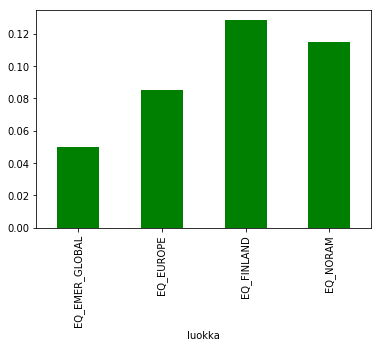

In [15]:
#Viiden vuoden tuottojen keskiarvot rahastoluokittain
df['t5'].groupby(df['luokka']).mean().plot(kind='bar', color='green')

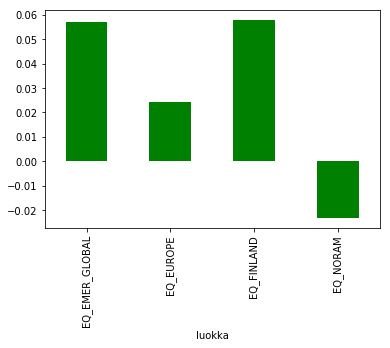

In [16]:
#Vuoden tuottojen keskiarvot rahastoluokittain
df['t1'].groupby(df['luokka']).mean().plot(kind='bar', color='green')

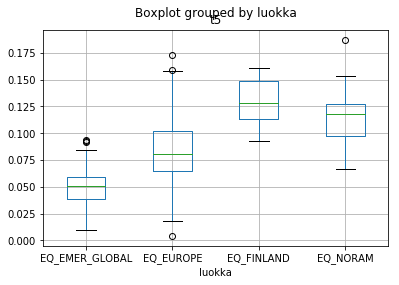

In [7]:
#5 vuoden tuottojen jakauma rahastoluokittain
df.boxplot(column='t5', by='luokka')

In [8]:
#Vuoden tuottojen ja hoitokulujen korrelaatio
df[['t1', 'palkkio']].corr()

,t1,palkkio
t1,1.000000,-0.009209
palkkio,-0.009209,1.000000


In [9]:
#Vuoden tuottojen ja hoitokulujen korrelaatio rahastoluokittain
df[['t1', 'palkkio']].groupby(df['luokka']).corr()

t1   palkkio
luokka                                    
EQ_EMER_GLOBAL t1       1.000000 -0.250190
               palkkio -0.250190  1.000000
EQ_EUROPE      t1       1.000000  0.074487
               palkkio  0.074487  1.000000
EQ_FINLAND     t1       1.000000 -0.466711
               palkkio -0.466711  1.000000
EQ_NORAM       t1       1.000000  0.027261
               palkkio  0.027261  1.000000

In [10]:
#Osa-aineisto, jossa vuoden tuotot, hoitokulut ja rahastoluokka; puuttuvia arvoja sisältävät rivit poistettu
df1=df[['t1','palkkio','luokka']].dropna()
df1.head()

,t1,palkkio,luokka
0,0.131277,0.0130,EQ_EMER_GLOBAL
1,0.055690,0.0100,EQ_EMER_GLOBAL
2,-0.036157,0.0163,EQ_EMER_GLOBAL
3,-0.040070,0.0192,EQ_EMER_GLOBAL
4,0.072944,0.0050,EQ_EMER_GLOBAL


In [11]:
#Korrelaatiokerroin ja p-arvo
import scipy.stats
scipy.stats.pearsonr(df1['t1'], df1['palkkio'])

(-0.009209004360211208, 0.869453487608243)

In [12]:
#Korrelaatiokertoimet ja p-arvot rahastoluokittain
luokat=df1['luokka'].unique()
for value in luokat:
    dfluokka=df1[df1['luokka']==value]
    print(value, scipy.stats.pearsonr(dfluokka['t1'], dfluokka['palkkio']))

EQ_EMER_GLOBAL (-0.25019049788557834, 0.036716691224622997)
EQ_EUROPE (0.07448733749907611, 0.3870025342697202)
EQ_FINLAND (-0.46671138276680413, 0.0027440367411678554)
EQ_NORAM (0.027260936819367768, 0.8164102763201186)


(0, 0.03)

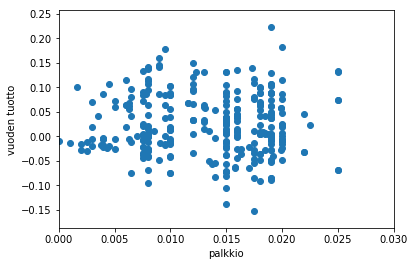

In [13]:
plt.scatter(df1['palkkio'], df1['t1'])
plt.xlabel('palkkio')
plt.ylabel('vuoden tuotto')
plt.xlim(0,0.03)

(0, 0.025)

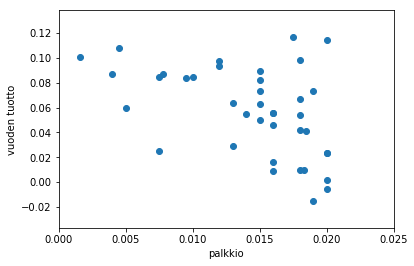

In [14]:
df_finland= df[df['luokka']=='EQ_FINLAND']
plt.scatter(df_finland['palkkio'], df_finland['t1'])
plt.xlabel('palkkio')
plt.ylabel('vuoden tuotto')
plt.xlim(0,0.025)